* Problem Statement - Whether a person has survived or not while sinking of the Titanic

* Image 9

pclass: Passenger Class
1st = Upper
2nd = Middle
3rd = Lower

sibsp: No.of siblings and spouse
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Embarked: Port of Embarkation	
C = Cherbourg, Q = Queenstown, S = Southampton

#### Collecting Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
titanic_data = pd.read_csv('Data Sets/titanic.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# print no.of passengers

print("No. of passengers travelling : "+str(len(titanic_data.index)))

No. of passengers travelling : 891


#### Analysing Data

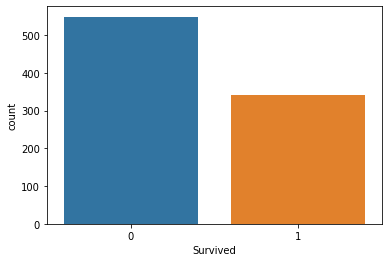

In [4]:
# Plot between survived and not survived

sns.countplot(x="Survived", data = titanic_data)

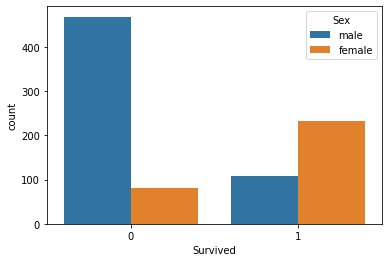

In [5]:
# no. of males and female survived

sns.countplot(x="Survived", hue="Sex", data = titanic_data)

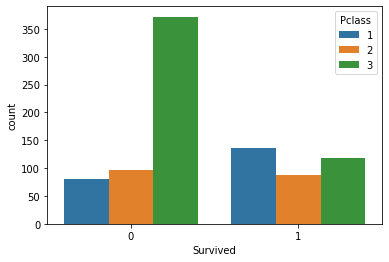

In [6]:
# analysis for passenger class
sns.countplot(x="Survived", hue="Pclass", data = titanic_data)

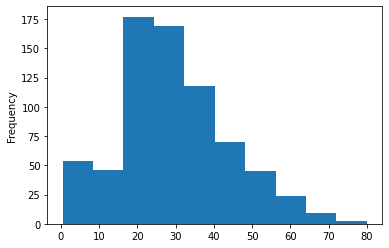

In [7]:
# age analysis

titanic_data["Age"].plot.hist()

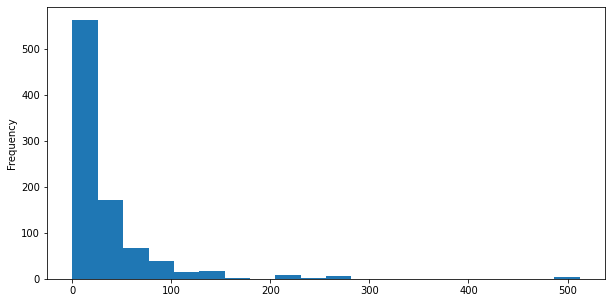

In [8]:
# fare analysis

titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


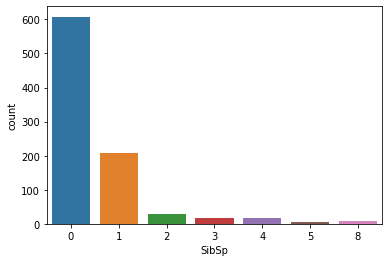

In [10]:
sns.countplot(x = "SibSp",data = titanic_data)

#### Data Wrangling

In [11]:
# check data set is null or not

titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

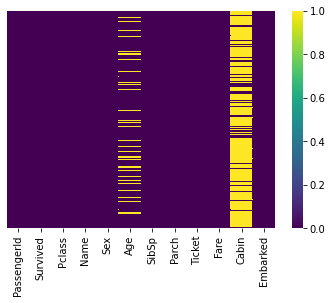

In [13]:
# can also checked by plotting heatmap

sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

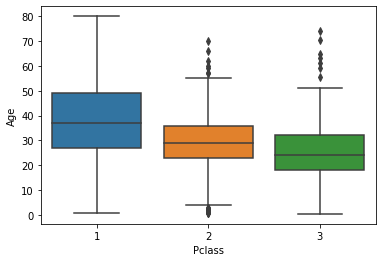

In [14]:
# first working on age column
# plot box plot

sns.boxplot(x="Pclass", y="Age", data=titanic_data)

# passenger travelling in class 1 and 2 are older than 3

In [15]:
# removing unused column

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_data.drop("Cabin", axis = 1, inplace=True)

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
# drop all NA values

titanic_data.dropna(inplace=True)

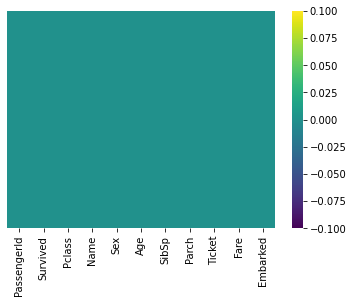

In [19]:
# again checking null

sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

In [20]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
titanic_data.head(2)

# here we see lots of string values that must be converted to categorical variables for logistic regression
# for this we will convert them to dummy variable using pandas
# for machine learning there should be no string 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [22]:
# first converting sex value to dummy variable 1-male 0-female

pd.get_dummies(titanic_data["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [23]:
sex = pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head()

# 1-male 0-female

,male
0,1
1,0
2,0
3,0
4,1


In [24]:
# now for embarked

embark = pd.get_dummies(titanic_data["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [25]:
embark = pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head()

# if Q and S both are 0 then the value is definately C

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
Pcls = pd.get_dummies(titanic_data["Pclass"])
Pcls.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [27]:
Pcls = pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pcls.head()

# if 2 and 3 both are 0 then the passenger is travelling at class 1

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [28]:
# now all values are made categorical
# now concatinating all new rows into a new dataset

titanic_data = pd.concat([titanic_data,sex,embark,Pcls],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [29]:
# row drop all unnecessary columns

titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass'],axis=1, inplace=True)

In [30]:
titanic_data.head(5)

# final data set

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


#### Training Data

In [31]:
Y = titanic_data['Survived']
X = titanic_data[['Age','SibSp','Parch','Fare','male','Q','S',2,3]]  # drop survived and so all columns under X

In [32]:
# Split data into training datasets and testing datasets

from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state=0)

In [34]:
# creating a model
from sklearn.linear_model import LogisticRegression
# creating instance of logistic regression
logmodel = LogisticRegression()

In [35]:
# fitting the model

logmodel.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# prediction

Y_pred = logmodel.predict(X_test)

In [37]:
# calculate classification report for accuaracy check

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.84      0.70      0.77        61

    accuracy                           0.82       143
   macro avg       0.82      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143



In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[74,  8],
       [18, 43]], dtype=int64)

In [39]:
# accuracy score 

from sklearn.metrics import accuracy_score
accu = accuracy_score(Y_test,Y_pred)
accu

0.8181818181818182

In [40]:
X_test

,Age,SibSp,Parch,Fare,male,Q,S,2,3
423,28.00,1,1,14.4000,0,0,1,0,1
178,30.00,0,0,13.0000,1,0,1,1,0
305,0.92,1,2,151.5500,1,0,1,0,0
292,36.00,0,0,12.8750,1,0,0,1,0
592,47.00,0,0,7.2500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
850,4.00,4,2,31.2750,1,0,1,0,1
703,25.00,0,0,7.7417,1,1,0,0,1
124,54.00,0,1,77.2875,1,0,1,0,0
471,38.00,0,0,8.6625,1,0,1,0,1


In [41]:
Y_pred = logmodel.predict([[60,2,2,20,0,0,0,0,0]])
Y_pred

array([1], dtype=int64)